In [5]:
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score, confusion_matrix



In [6]:
from sklearn.datasets import fetch_openml

x,y = fetch_openml('mnist_784' , version=1 ,cache=True , return_X_y=True)

In [7]:
y=y.astype(int) 
x= x.to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.1 , stratify=y , random_state=42)
print( " The Number of Training data is =" ,x_train.shape[0] )
print( " The Number of Training data is =" ,x_test.shape[0] )

 The Number of Training data is = 63000
 The Number of Training data is = 7000


In [24]:
from sklearn.neural_network import MLPClassifier
# MLP_model = MLPClassifier( max_iter=20 ,solver='sgd' , verbose='true' , validation_fraction=0.0 )
MLP_model = MLPClassifier(hidden_layer_sizes= (200,400) , max_iter=20,solver='sgd' , verbose='true' , validation_fraction=0.0 )

MLP_model.fit(x_train , y_train)

Iteration 1, loss = 2.54027848
Iteration 2, loss = 1.99835556
Iteration 3, loss = 1.90238102
Iteration 4, loss = 1.83684067
Iteration 5, loss = 1.79300826
Iteration 6, loss = 1.70360737
Iteration 7, loss = 1.58033411
Iteration 8, loss = 1.50954839
Iteration 9, loss = 1.46502522
Iteration 10, loss = 1.30653723
Iteration 11, loss = 1.27311475
Iteration 12, loss = 1.21080351
Iteration 13, loss = 1.14923687
Iteration 14, loss = 1.01299897
Iteration 15, loss = 0.92271159
Iteration 16, loss = 0.85526962
Iteration 17, loss = 0.79544426
Iteration 18, loss = 0.74031883
Iteration 19, loss = 0.68285450
Iteration 20, loss = 0.66036502


C:\Users\tamer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200, 400), max_iter=20, solver='sgd',
              validation_fraction=0.0, verbose='true')

In [25]:
print(MLP_model.n_layers_ ) #hidden layer 
print( MLP_model.hidden_layer_sizes) #hidden layer size

for layer in range (MLP_model.n_layers_-1):
    print("layer", layer , "weights" , MLP_model.coefs_[layer].shape , "Bias is",MLP_model.intercepts_[layer].shape)

4
(200, 400)
layer 0 weights (784, 200) Bias is (200,)
layer 1 weights (200, 400) Bias is (400,)
layer 2 weights (400, 10) Bias is (10,)


In [12]:
y_pred = MLP_model.predict(x_train)
y_pred_test = MLP_model.predict(x_test)



In [18]:
from sklearn.metrics import classification_report
import seaborn as sns 

def drawing_conf_matrix (y_actual , y_predict):
    print(classification_report (y_actual , y_predict))
    
    conf_mat = confusion_matrix( y_actual , y_predict)
    
    print(conf_mat)
    sns.heatmap(conf_mat , annot= True , fmt = "")
    plt.ylabel('True label')
    plt.xlabel('predict label')

    

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      6213
           1       0.99      0.96      0.98      7089
           2       0.92      0.92      0.92      6291
           3       0.83      0.93      0.88      6427
           4       0.95      0.91      0.93      6142
           5       0.88      0.77      0.83      5682
           6       0.91      0.97      0.94      6188
           7       0.97      0.93      0.95      6564
           8       0.85      0.93      0.89      6142
           9       0.93      0.91      0.92      6262

    accuracy                           0.92     63000
   macro avg       0.92      0.92      0.92     63000
weighted avg       0.92      0.92      0.92     63000

[[5766    0   24    6    3  173  143    3   93    2]
 [   1 6807   25   99    5   20    6   16  100   10]
 [  25    3 5759  137   29   43  131   31  128    5]
 [   5    2  150 6007    2   61   11   25  130   34]
 [   5    7   25   25 5603   

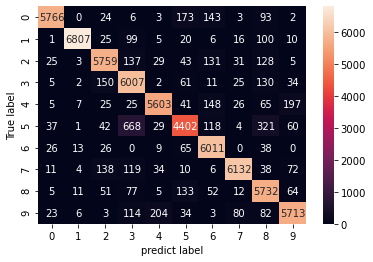

In [19]:
drawing_conf_matrix(y_train , y_pred)


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       690
           1       0.98      0.97      0.98       788
           2       0.93      0.91      0.92       699
           3       0.82      0.92      0.87       714
           4       0.94      0.91      0.92       682
           5       0.87      0.76      0.81       631
           6       0.91      0.97      0.93       688
           7       0.95      0.93      0.94       729
           8       0.85      0.90      0.88       683
           9       0.89      0.89      0.89       696

    accuracy                           0.91      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.91      0.91      7000

[[642   0   6   0   0  22  12   0   7   1]
 [  0 763   0   9   0   1   1   1  11   2]
 [  3   0 637  14   1   5  16   7  15   1]
 [  2   0  18 656   0  10   5   6  17   0]
 [  0   0   0   4 622   1  13   3   4  35]
 [  3   1   1  80   6 479 

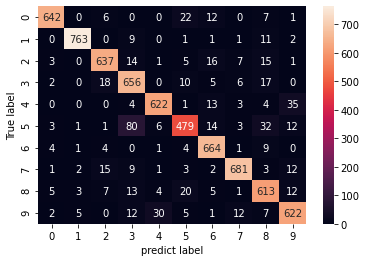

In [22]:
drawing_conf_matrix(y_test , y_pred_test)
